In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from scipy import linspace, polyval, sqrt, randn

In [2]:
# sample data creation
# source: https://github.com/tirthajyoti/PythonMachineLearning/blob/master/Linear_Regression_Methods.ipynb
# number of points 
n = int(5000)
X = np.linspace(-20, 20, n)
# equation parameters
a = 4.7; b = -10.3
Y = polyval([a,b], X)
# add some gaussian noise
Yn = Y + 3 * randn(n)

Full Gradient Descent..
Time taken:  0.31 secs
No of iterations:  200
R2 score:  0.99626
Plot: 


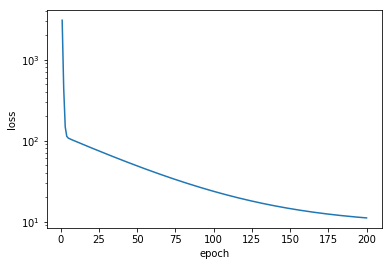

In [28]:
# Full Gradient Descent
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
prev_step = 1
eta = 0.005 # learning rate
epoch = 0
max_epochs = 200 # no of iterations to run GD
aggregate_loss_fgd = []

# perform full gradient descent
while epoch < max_epochs:
    Y_pred = m * X + c
    loss = (1/n)* sum((Yn - Y_pred) ** 2)
    aggregate_loss_fgd.append(loss)
    D_m = (-2/n) * sum((Yn - Y_pred) * X)
    D_c = (-2/n) * sum(Yn - Y_pred)
    prev_m = m
    m = m - eta * D_m
    c = c - eta * D_c
    epoch += 1
end = time.time()

# predict values
Y_pred = m * X + c

print("Full Gradient Descent..")
print("Time taken: ", round(end - start, 2), "secs")
print("No of iterations: ", epoch)
print("R2 score: ", round(r2_score(Yn, Y_pred), 5))

# loss function plot
x_axis = np.linspace(1, max_epochs, max_epochs, endpoint=True)
plt.semilogy(x_axis, aggregate_loss_fgd)
plt.xlabel('epoch')
plt.ylabel('loss')
print("Plot: ")
plt.show()

Stochastic Gradient Descent..
Time taken:  2.25 secs
R2 score:  0.99617
Plot: 


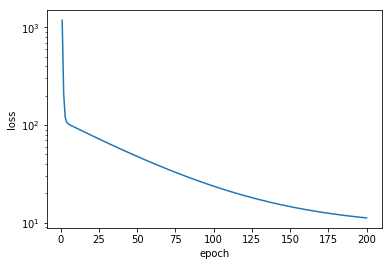

In [30]:
# Stochastic Gradient Descent
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
eta = 0.005 # learning rate
epoch = 0
max_epochs = 200 # no of iterations to run GD
aggregate_loss_sgd = []

for epoch in range(max_epochs):
    Y_pred = np.empty(len(X))
    for i in range(len(X)):
        Y_pred[i] = (m * X[i] + c)
        D_m = eta * (-2/n) * ((Yn[i] - Y_pred[i]) * X[i])
        D_c = eta * (-2/n) * (Yn[i] - Y_pred[i])
        m = m - D_m
        c = c - D_c
    loss = (1/n)* sum((Yn - Y_pred) ** 2)
    aggregate_loss_sgd.append(loss)
end = time.time()

# predict values
Y_pred = m * X + c

print("Stochastic Gradient Descent..")
print("Time taken: ", round(end - start, 2), "secs")
print("R2 score: ", round(r2_score(Yn, Y_pred), 5))

# loss function plot
x_axis = np.linspace(1, max_epochs, max_epochs, endpoint=True)
plt.semilogy(x_axis, aggregate_loss_sgd)
plt.xlabel('epoch')
plt.ylabel('loss')
print("Plot: ")
plt.show()

SGD with momentum..
Time taken:  3.06 secs
R2 score:  0.99687
Plot: 


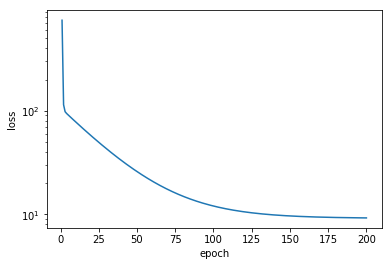

In [27]:
# SGD with momentum
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
eta = 0.005 # learning rate
gamma = 0.9 # momentum hyper parameter in range (0,1]
beta = 0.9
epoch = 0
max_epochs = 200 # no of iterations to run GD
aggregate_loss_sgdm = []

for epoch in range(max_epochs):
    Y_pred = np.empty(len(X))
    prev_D_m = 0
    prev_D_c = 0
    for i in range(len(X)):
        Y_pred[i] = (m * X[i] + c)
        D_m = eta * (-2/n) * ((Yn[i] - Y_pred[i]) * X[i])
        D_c = eta * (-2/n) * (Yn[i] - Y_pred[i])
        m = m - (gamma * prev_D_m + D_m)
        c = c - (gamma * prev_D_c + D_c)
        prev_D_m = beta * prev_D_m + (1 - beta) * D_m
        prev_D_c = beta * prev_D_c + (1 - beta) * D_c
    loss = (1/n)* sum((Yn - Y_pred) ** 2)
    aggregate_loss_sgdm.append(loss)
end = time.time()

# predict values
Y_pred = m * X + c

print("SGD with momentum..")
print("Time taken: ", round(end - start, 2), "secs")
print("R2 score: ", round(r2_score(Yn, Y_pred), 5))

# loss function plot
x_axis = np.linspace(1, max_epochs, max_epochs, endpoint=True)
plt.semilogy(x_axis, aggregate_loss_sgdm)
plt.xlabel('epoch')
plt.ylabel('loss')
print("Plot: ")
plt.show()

AdaGrad..
Time taken:  28.59 secs
R2 score:  0.99691
Plot: 


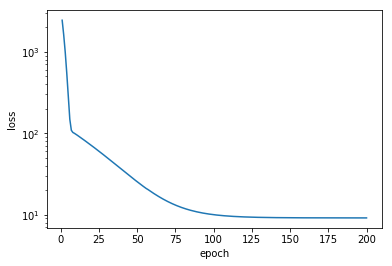

In [31]:
# AdaGrad
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
eta_m = 0.01 # initial learning rate for both parameters
eta_c = 0.001
epsilon = 1e-8 # smoothing term to avoid division by zero
epoch = 0
max_epochs = 200 # no of iterations to run GD
aggregate_loss_adagrad = []

for epoch in range(max_epochs):
    Y_pred = np.empty(len(X))
    D_m_history = 0
    D_c_history = 0
    for i in range(len(X)):
        Y_pred[i] = (m * X[i] + c)
        # gradient of the cost function w.r.t to each parameter at the current value of the parameter
        D_m = (-2/n) * ((Yn[i] - Y_pred[i]) * X[i])
        D_c = (-2/n) * (Yn[i] - Y_pred[i])
        D_m_history += D_m ** 2
        D_c_history += D_c ** 2
        # w = w + delta_w
        delta_m = - (eta_m / (sqrt(D_m_history) + epsilon) * D_m)
        delta_c = - (eta_c / (sqrt(D_c_history) + epsilon) * D_c)
        m = m + delta_m
        c = c + delta_c    
    loss = (1/n)* sum((Yn - Y_pred) ** 2)
    aggregate_loss_adagrad.append(loss)
end = time.time()

# predict values
Y_pred = m * X + c

print("AdaGrad..")
print("Time taken: ", round(end - start, 2), "secs")
print("R2 score: ", round(r2_score(Yn, Y_pred), 5))

# loss function plot
x_axis = np.linspace(1, epoch+1, epoch+1, endpoint=True)
plt.semilogy(x_axis, aggregate_loss_adagrad)
plt.xlabel('epoch')
plt.ylabel('loss')
print("Plot: ")
plt.show()

RMSProp..
Time taken:  30.05 secs
R2 score:  0.99689
Plot: 


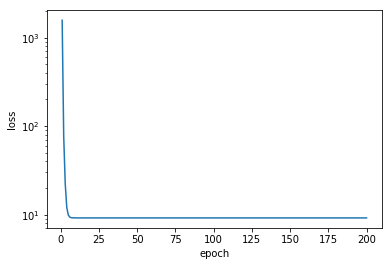

In [49]:
# RMSProp
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
eta_m = 0.001 # initial learning rate for both parameters
eta_c = 0.001
epsilon = 1e-8 # smoothing term to avoid division by zero
gamma = 0.9
epoch = 0
max_epochs = 200 # no of iterations to run GD
aggregate_loss_rmsprop = []

for epoch in range(max_epochs):
    Y_pred = np.empty(len(X))
    D_m_history = 0
    D_c_history = 0
    for i in range(len(X)):
        Y_pred[i] = (m * X[i] + c)
        # gradient of the cost function w.r.t to each parameter at the current value of the parameter
        D_m = (-2/n) * ((Yn[i] - Y_pred[i]) * X[i])
        D_c = (-2/n) * (Yn[i] - Y_pred[i])
        D_m_history = (gamma * D_m_history) + ((1 - gamma) * D_m ** 2)
        D_c_history = (gamma * D_c_history) + ((1 - gamma) * D_c ** 2)
        # w = w + delta_w
        delta_m = - (eta_m / (sqrt(D_m_history) + epsilon) * D_m)
        delta_c = - (eta_c / (sqrt(D_c_history) + epsilon) * D_c)
        m = m + delta_m
        c = c + delta_c    
    loss = (1/n)* sum((Yn - Y_pred) ** 2)
    aggregate_loss_rmsprop.append(loss)
end = time.time()

# predict values
Y_pred = m * X + c

print("RMSProp..")
print("Time taken: ", round(end - start, 2), "secs")
print("R2 score: ", round(r2_score(Yn, Y_pred), 5))

# loss function plot
x_axis = np.linspace(1, epoch+1, epoch+1, endpoint=True)
plt.semilogy(x_axis, aggregate_loss_rmsprop)
plt.xlabel('epoch')
plt.ylabel('loss')
print("Plot: ")
plt.show()

In [47]:
# AdaDelta
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
epsilon = 1e-8 # smoothing term to avoid division by zero
gamma = 0.9
epoch = 0
max_epochs = 50 # no of iterations to run GD
aggregate_loss_adadelta = []

for epoch in range(max_epochs):
    Y_pred = np.empty(len(X))
    D_m_rms_history = 0
    D_c_rms_history = 0
    delta_m_rms_history = 0
    delta_c_rms_history = 0
    D_m_sum = 0
    D_c_sum = 0
    delta_m_sum = 0
    delta_c_sum = 0
    for i in range(len(X)):
        Y_pred[i] = (m * X[i] + c)
        # gradient of the cost function w.r.t to each parameter at the current value of the parameter
        D_m = (-2/n) * ((Yn[i] - Y_pred[i]) * X[i])
        D_c = (-2/n) * (Yn[i] - Y_pred[i])
        # rms history of delta_w and gradient_w
        delta_m_sum = gamma * delta_m_sum + (1 - gamma) * D_m ** 2
        delta_c_sum = gamma * delta_c_sum + (1 - gamma) * D_c ** 2
        delta_m_rms_history = gamma * delta_m_rms_history + (1 - gamma) * delta_m ** 2
        delta_c_rms_history = gamma * delta_c_rms_history + (1 - gamma) * delta_c ** 2
        # w = w + delta_w
        delta_m = - (sqrt(delta_m_rms_history + epsilon) / sqrt(D_m_sum + epsilon)) * D_m
        delta_c = - (sqrt(delta_c_rms_history + epsilon) / sqrt(D_c_sum + epsilon)) * D_c
        m = m + delta_m
        c = c + delta_c
    loss = (1/n)* sum((Yn - Y_pred) ** 2)
    aggregate_loss_adadelta.append(loss)
end = time.time()

# predict values
Y_pred = m * X + c

print("AdaDelta..")
print("Time taken: ", round(end - start, 2), "secs")
print("R2 score: ", round(r2_score(Yn, Y_pred), 5))

# loss function plot
x_axis = np.linspace(1, epoch+1, epoch+1, endpoint=True)
plt.semilogy(x_axis, aggregate_loss_adadelta)
plt.xlabel('epoch')
plt.ylabel('loss')
print("Plot: ")
plt.show()

AdaDelta..
Time taken:  13.32 secs


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ADAM..
Time taken:  33.8 secs
R2 score:  0.99688
Plot: 


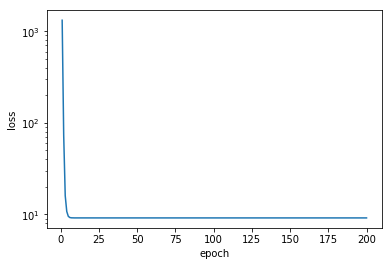

In [7]:
# ADAM
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
eta_m = 0.001 # initial learning rate for both parameters
eta_c = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8 # smoothing term to avoid division by zero
epoch = 0
max_epochs = 200 # no of iterations to run GD
aggregate_loss_adam = []

for epoch in range(max_epochs):
    Y_pred = np.empty(len(X))
    D_m_history = 0
    D_c_history = 0
    D_m_squared_history = 0
    D_c_squared_history = 0
    mt_m = 0
    vt_m = 0
    mt_c = 0
    vt_c = 0
    for i in range(len(X)):
        Y_pred[i] = (m * X[i] + c)
        # gradient of the cost function w.r.t to each parameter at the current value of the parameter
        D_m = (-2/n) * ((Yn[i] - Y_pred[i]) * X[i])
        D_c = (-2/n) * (Yn[i] - Y_pred[i])        
        D_m_squared_history = D_m ** 2
        D_c_squared_history = D_c ** 2
        D_m_history = D_m
        D_c_history = D_c
        
        mt_m = (beta1 * mt_m) + ((1 - beta1) * D_m_history)
        vt_m = (beta2 * vt_m) + ((1 - beta2) * D_m_squared_history)
        mt_c = (beta1 * mt_c) + ((1 - beta1) * D_c_history)
        vt_c = (beta2 * vt_c) + ((1 - beta2) * D_c_squared_history)
        
        delta_m = - (eta_m / (sqrt(vt_m) + epsilon) * mt_m)
        delta_c = - (eta_c / (sqrt(vt_c) + epsilon) * mt_c)
        # w = w + delta_w
        m = m + delta_m
        c = c + delta_c
    loss = (1/n)* sum((Yn - Y_pred) ** 2)
    aggregate_loss_adam.append(loss)
end = time.time()

# predict values
Y_pred = m * X + c

print("ADAM..")
print("Time taken: ", round(end - start, 2), "secs")
print("R2 score: ", round(r2_score(Yn, Y_pred), 5))

# loss function plot
x_axis = np.linspace(1, epoch+1, epoch+1, endpoint=True)
plt.semilogy(x_axis, aggregate_loss_adam)
plt.xlabel('epoch')
plt.ylabel('loss')
print("Plot: ")
plt.show()

Comparison Plot: 


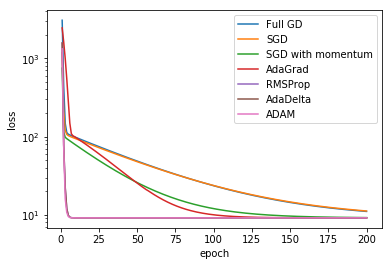

In [53]:
# comparitive loss function plot
# plotting function source: https://gluon.mxnet.io/chapter06_optimization/gd-sgd-scratch.html
x_axis = np.linspace(1, 200, 200, endpoint=True)
plt.semilogy(x_axis, aggregate_loss_fgd, label='Full GD')
plt.semilogy(x_axis, aggregate_loss_sgd, label='SGD')
plt.semilogy(x_axis, aggregate_loss_sgdm, label='SGD with momentum')
plt.semilogy(x_axis, aggregate_loss_adagrad, label='AdaGrad')
plt.semilogy(x_axis, aggregate_loss_rmsprop, label='RMSProp')
plt.semilogy(x_axis, aggregate_loss_rmsprop, label='AdaDelta')
plt.semilogy(x_axis, aggregate_loss_adam, label='ADAM')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
print("Comparison Plot: ")
plt.show()

AdaDelta..
Time taken: 27.38 secs
R2 score: 0.99699
Plot: 


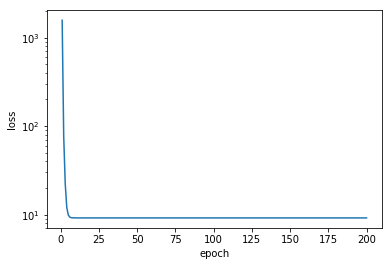

In [52]:
print("AdaDelta..")
print("Time taken: 27.38 secs")
print("R2 score: 0.99699")

# loss function plot
x_axis = np.linspace(1, epoch+1, epoch+1, endpoint=True)
plt.semilogy(x_axis, aggregate_loss_rmsprop)
plt.xlabel('epoch')
plt.ylabel('loss')
print("Plot: ")
plt.show()